## Removing Time Series Noise

## Load Data

In [1]:
#import required libraries
import pandas as pd

#load lob csv
lob = pd.read_csv('lob.csv')

#dataset dimensions
lob.shape

(1037853, 15)

In [2]:
lob.head()

,Timestamp,Date,Exchange,Bid,Ask,Mid_Price,SMA_Short,SMA_Long,EMA_Short,EMA_Long,RSI,Upper_BB,Lower_BB,Volume,OBV
0,1.333,2025-01-02,Exch0,"[[1, 6]]","[[800, 1]]",400.5,NaN,NaN,400.500000,400.500000,NaN,NaN,NaN,7,0
1,1.581,2025-01-02,Exch0,"[[1, 6]]","[[799, 1]]",400.0,NaN,NaN,400.409091,400.480392,NaN,NaN,NaN,7,-7
2,1.643,2025-01-02,Exch0,"[[1, 6]]","[[798, 1]]",399.5,NaN,NaN,400.243802,400.441945,NaN,NaN,NaN,7,-14
3,1.736,2025-01-02,Exch0,"[[261, 1], [1, 6]]","[[798, 1]]",529.5,NaN,NaN,423.744929,405.503046,NaN,NaN,NaN,8,-6
4,1.984,2025-01-02,Exch0,"[[261, 1], [1, 6]]","[[797, 1]]",529.0,NaN,NaN,442.882214,410.346063,NaN,NaN,NaN,8,-14


In [3]:
#drop exchange
lob = lob.drop('Exchange', axis=1)

#ensure 'Timestamp' is treated as a number
lob['Timestamp'] = pd.to_numeric(lob['Timestamp'])
#sort df by date and Timestamp to ensure it's in chronological order
lob.sort_values(by=['Date','Timestamp'], inplace=True)

#future mid-price as target
lob['Mid_Price_Future'] = lob['Mid_Price'].shift(-1) 

In [4]:
#interpolate RSI nulls
lob['RSI'] = lob['RSI'].interpolate(method='linear')

#interpolate SMA nulls
lob['SMA_Short'] = lob['SMA_Short'].interpolate(method='linear')
lob['SMA_Long'] = lob['SMA_Long'].interpolate(method='linear')

#intepolate BB nulls
lob['Upper_BB'] = lob['Upper_BB'].interpolate(method='linear')
lob['Lower_BB'] = lob['Lower_BB'].interpolate(method='linear')

#drop any remaining rows with nulls
lob = lob.dropna()

In [5]:
#parsing highest bid, lowest ask, and calc the spread from bid ask 
import ast 

#convert string to lists
lob['Bid'] = lob['Bid'].apply(ast.literal_eval)
lob['Ask'] = lob['Ask'].apply(ast.literal_eval)

#extract features
lob['Highest_Bid'] = lob['Bid'].apply(lambda x: max([b[0] for b in x]))
lob['Lowest_Ask'] = lob['Ask'].apply(lambda x: min([a[0] for a in x]))
lob['Spread'] = lob['Lowest_Ask'] - lob['Highest_Bid']

In [6]:
#convert to datetime
lob['Date'] = pd.to_datetime(lob['Date'])

#extract dow (0=monday, 6=sunday)
lob['Day_of_Week'] = lob['Date'].dt.dayofweek

In [7]:
lob.head()

,Timestamp,Date,Bid,Ask,Mid_Price,SMA_Short,SMA_Long,EMA_Short,EMA_Long,RSI,Upper_BB,Lower_BB,Volume,OBV,Mid_Price_Future,Highest_Bid,Lowest_Ask,Spread,Day_of_Week
49,9.393,2025-01-02,"[[266, 6], [261, 1], [260, 11], [178, 15]]","[[273, 1], [274, 1], [276, 3], [277, 10], [282...",269.5,270.85,292.43,270.810194,295.830660,0.0,274.714484,269.285516,54,-519,269.0,266,273,7,3
50,9.424,2025-01-02,"[[266, 6], [261, 1], [260, 11], [178, 15]]","[[272, 1], [273, 1], [276, 3], [277, 10], [282...",269.0,270.55,289.80,270.481068,294.778478,0.0,274.703535,268.846465,54,-573,268.5,266,272,6,3
51,9.517,2025-01-02,"[[266, 6], [261, 1], [260, 11], [178, 15]]","[[271, 5], [272, 1], [273, 1], [276, 3], [277,...",268.5,270.20,287.17,270.120874,293.747949,0.0,274.577935,268.422065,54,-627,268.5,266,271,5,3
52,9.641,2025-01-02,"[[266, 6], [261, 1], [260, 11], [259, 1], [178...","[[271, 5], [272, 1], [273, 1], [276, 3], [277,...",268.5,269.90,284.55,269.826170,292.757833,0.0,274.453616,268.046384,55,-627,268.5,266,271,5,3
53,9.672,2025-01-02,"[[266, 6], [261, 1], [260, 11], [259, 1], [178...","[[271, 5], [272, 1], [273, 1], [276, 3], [277,...",268.5,269.65,279.33,269.585048,291.806546,0.0,274.244428,267.755572,55,-627,268.0,266,271,5,3


## Noise Reduction 

__SMA__
Moving averages involve calculating the average of a fixed number of consecutive data points, such as the previous three or five points. This can help to remove short-term fluctuations in the data and reveal longer-term trends.

In [8]:
#SMA
#already have SMA long and short in df from eda so will make future verison
lob['SMA_Short_Future'] = lob['SMA_Short'].shift(-1) 
lob['SMA_Long_Future'] = lob['SMA_Long'].shift(-1) 

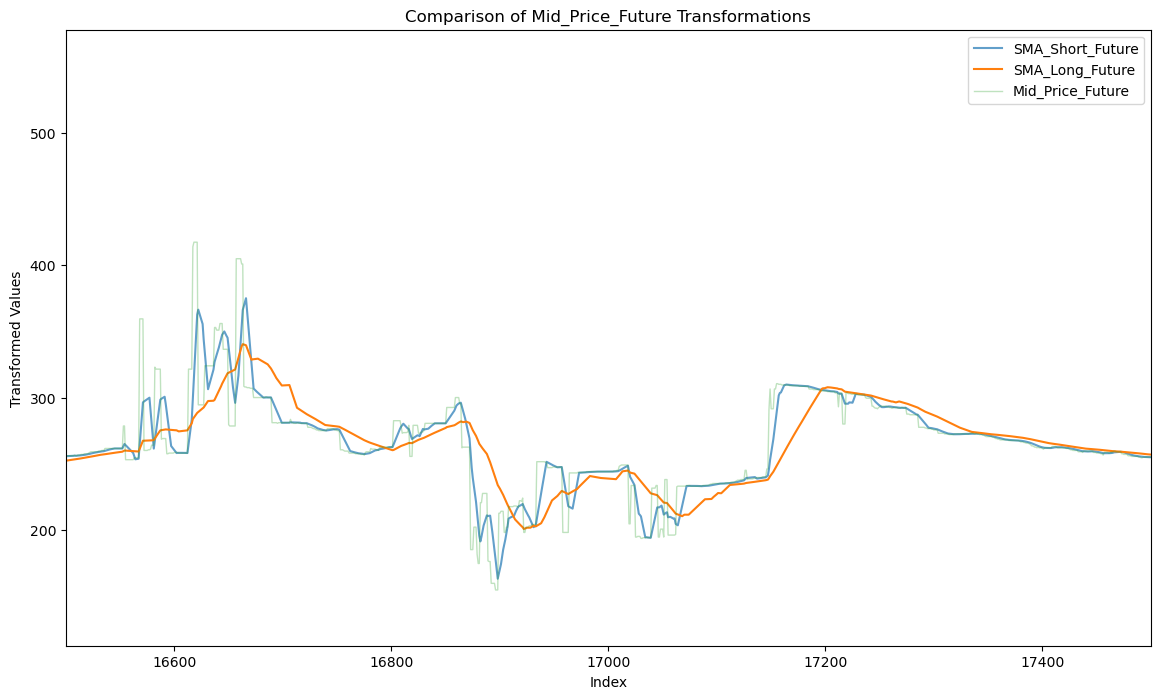

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(lob.index, lob['SMA_Short_Future'], label='SMA_Short_Future', alpha=0.7)
plt.plot(lob.index, lob['SMA_Long_Future'], label='SMA_Long_Future')
plt.plot(lob.index, lob['Mid_Price_Future'], label='Mid_Price_Future', linewidth=1,alpha=0.3)

start_index = 16500  
end_index = 17500  
plt.xlim(start_index, end_index)

plt.title('Comparison of Mid_Price_Future Transformations')
plt.xlabel('Index')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

__EMA__
Exponential smoothing is a data smoothing technique that uses a weighted average of past observations to generate a smoothed value for the current observation. The weights assigned to each past observation decrease exponentially over time, with more recent observations being given greater weight than older ones.

In [10]:
#EMA
#already have EMA long and short in df from eda so will make future verison
lob['EMA_Short_Future'] = lob['EMA_Short'].shift(-1) 
lob['EMA_Long_Future'] = lob['EMA_Long'].shift(-1) 

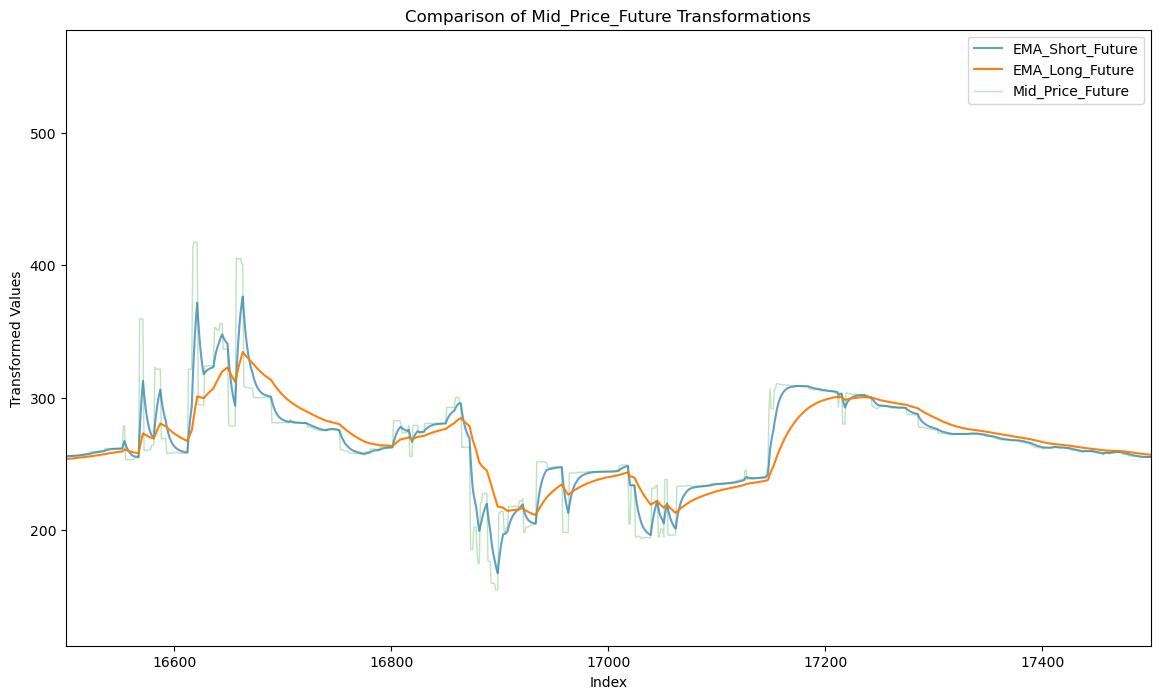

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(lob.index, lob['EMA_Short_Future'], label='EMA_Short_Future', alpha=0.7)
plt.plot(lob.index, lob['EMA_Long_Future'], label='EMA_Long_Future')
plt.plot(lob.index, lob['Mid_Price_Future'], label='Mid_Price_Future', linewidth=1,alpha=0.3)

start_index = 16500  
end_index = 17500  
plt.xlim(start_index, end_index)

plt.title('Comparison of Mid_Price_Future Transformations')
plt.xlabel('Index')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

__Spline__
This smoothing technique for time series data that involves fitting a piecewise polynomial curve to the data points. This method can be particularly useful for time series data that exhibit complex and non-linear patterns, such as seasonal or cyclical fluctuations.

In [ ]:
#Spline smoothing  #wont complete for some reason (might just take a really long time)
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

x_values = np.arange(len(lob))  

y_values = lob['Mid_Price_Future']

#apply spline smoothing
spl = UnivariateSpline(x_values, y_values, s=1000) #set s toabout 0.1% of len

#new col
lob['Mid_Price_Future_spline'] = spl(x_values)

__Wavelet Transform__
Wavelet transform is a  technique that decomposes a signal into components at various scales, allowing for the analysis of its characteristics at different frequencies and resolutions. Unlike Fourier transform, which only offers frequency information, wavelet transform provides both time and frequency information, making it particularly useful for analysing non-stationary signals where these properties change over time. 

In [12]:
#Wavelet transforms
import pandas as pd
import pywt
from scipy.interpolate import interp1d
import numpy as np

#choose wavelet
#wavelet = 'db1'  #daubechies 1 wavelet
wavelet = 'db6'  #daubechies 1 wavelet

#apply DWT - this decomposes the signal into approximation and detail coefficients
coeffs = pywt.dwt(lob['Mid_Price_Future'], wavelet)

#coeffs is a tuple: (cA, cD), where cA are approximation coefficients, cD are detail coefficients
cA, cD = coeffs

interp_func = interp1d(np.linspace(0, len(lob['Mid_Price_Future']) - 1, num=len(cA)), cA, fill_value="extrapolate")

#interpolate cA back to the original length
lob['Mid_Price_Future_wavelet'] = interp_func(np.arange(len(lob['Mid_Price_Future'])))

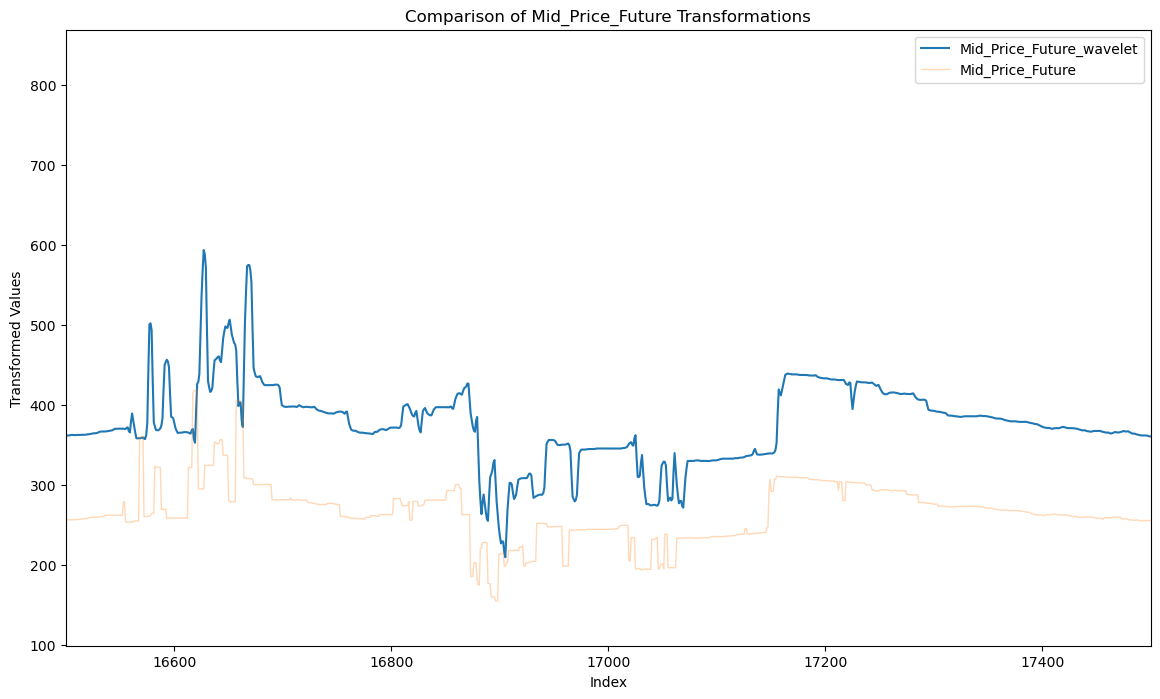

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(lob.index, lob['Mid_Price_Future_wavelet'], label='Mid_Price_Future_wavelet')
plt.plot(lob.index, lob['Mid_Price_Future'], label='Mid_Price_Future', linewidth=1,alpha=0.3)

start_index = 16500  
end_index = 17500  
plt.xlim(start_index, end_index)

plt.title('Comparison of Mid_Price_Future Transformations')
plt.xlabel('Index')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

__Kalman Filter__ Used to smooth and estimate the underlying state of a dynamic system from noisy measurements. It's particularly useful in time series analysis where you want to infer the true signal from noisy data.

In [ ]:
#pip install pykalman

In [14]:
#Kalman Filter
from pykalman import KalmanFilter
import numpy as np
import pandas as pd

#initialise Kalman Filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

#use Kalman Filter to estimate the hidden state of the system
state_means, _ = kf.filter(lob['Mid_Price_Future'].values)

#new col
lob['Mid_Price_Future_Kalman'] = state_means.flatten()

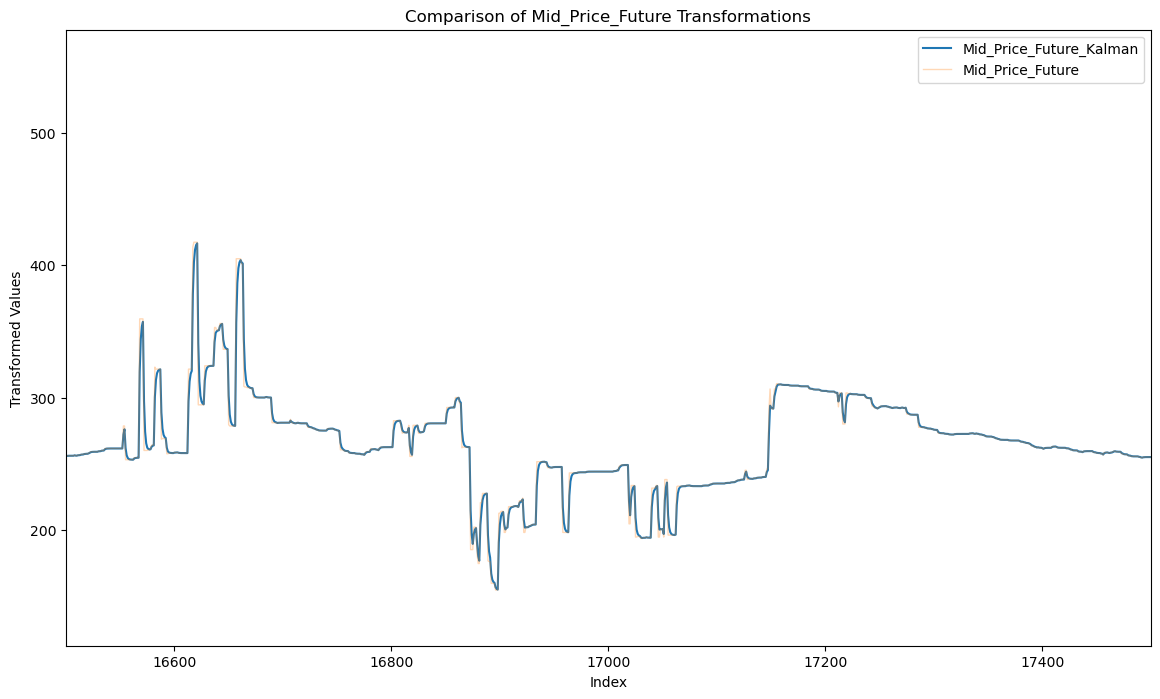

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(lob.index, lob['Mid_Price_Future_Kalman'], label='Mid_Price_Future_Kalman')
plt.plot(lob.index, lob['Mid_Price_Future'], label='Mid_Price_Future', linewidth=1,alpha=0.3)

start_index = 16500  
end_index = 17500  
plt.xlim(start_index, end_index)

plt.title('Comparison of Mid_Price_Future Transformations')
plt.xlabel('Index')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

__Fourier Transform__ Decomposes a signal into its constituent frequencies, providing a frequency domain representation. This can be useful for identifying dominant frequencies, filtering, or analysing the signal's frequency content.

__Kalman Smoothing__ An extension of the Kalman filter that smooths the entire dataset, taking into account future observations as well as past observations

In [16]:
from pykalman import KalmanFilter

def kalman_smoothing(data):
    kf = KalmanFilter(transition_matrices=[1],
                      observation_matrices=[1],
                      initial_state_mean=data.values[0],
                      initial_state_covariance=1,
                      observation_covariance=1,
                      transition_covariance=0.01)
    state_means, _ = kf.smooth(data)
    return state_means.flatten()

lob['Mid_Price_Future_Kalman_Smooth'] = kalman_smoothing(lob['Mid_Price_Future'])

__Wavelet thresholding__ Beyond just applying a wavelet transform, you can use wavelet thresholding to selectively keep or discard coefficients that represent noise.

In [17]:
import pywt

def wavelet_thresholding(data, wavelet, threshold):
    coeffs = pywt.wavedec(data, wavelet, mode='per')
    coeffs_thresh = [pywt.threshold(c, value=threshold, mode='soft') for c in coeffs]
    reconstructed_signal = pywt.waverec(coeffs_thresh, wavelet, mode='per')
    return reconstructed_signal

wavelet = 'db1'
threshold = 0.2
lob['Mid_Price_Future_Wavelet_Threshold'] = wavelet_thresholding(lob['Mid_Price_Future'], wavelet, threshold)[:-1]

__High frequency Noise reduction (band stop filter)__ Use a band-stop filter to specifically remove high-frequency components, which are often interpreted as noise.

In [18]:
from scipy.signal import iirnotch, lfilter

def notch_filter(data, cutoff, fs, quality_factor=30):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = iirnotch(normal_cutoff, quality_factor)
    y = lfilter(b, a, data)
    return y

fs = 30 
cutoff = 3.667  

lob['Mid_Price_Future_Notch'] = notch_filter(lob['Mid_Price_Future'], cutoff, fs)

__Low pass filters (butterworth filter)__ Implement a low-pass filter like the Butterworth filter to allow only signals below a certain frequency to pass through, effectively smoothing the data.

In [19]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 30 
cutoff = 3.667 

lob['Mid_Price_Future_Low_Pass'] = butter_lowpass_filter(lob['Mid_Price_Future'], cutoff, fs)

__Use simple IQR method__

In [ ]:
#mid price future outliers
#calc Q1, Q3, and IQR
Q1 = lob['Mid_Price_Future'].quantile(0.25)
Q3 = lob['Mid_Price_Future'].quantile(0.75)
IQR = Q3 - Q1

#outlier critieria
outliers_criteria = ((lob['Mid_Price_Future'] < (Q1 - 1.5 * IQR)) | (lob['Mid_Price_Future'] > (Q3 + 1.5 * IQR)))

#filter 
outliers = lob[outliers_criteria]

In [21]:
lob = lob.dropna(subset=['SMA_Short_Future', 'SMA_Long_Future', 'EMA_Short_Future', 'EMA_Long_Future'])

## Standardise

In [22]:
lob.columns

Index(['Timestamp', 'Date', 'Bid', 'Ask', 'Mid_Price', 'SMA_Short', 'SMA_Long',
       'EMA_Short', 'EMA_Long', 'RSI', 'Upper_BB', 'Lower_BB', 'Volume', 'OBV',
       'Mid_Price_Future', 'Highest_Bid', 'Lowest_Ask', 'Spread',
       'Day_of_Week', 'SMA_Short_Future', 'SMA_Long_Future',
       'EMA_Short_Future', 'EMA_Long_Future', 'Mid_Price_Future_wavelet',
       'Mid_Price_Future_Kalman', 'Mid_Price_Future_Kalman_Smooth',
       'Mid_Price_Future_Wavelet_Threshold', 'Mid_Price_Future_Notch',
       'Mid_Price_Future_Low_Pass'],
      dtype='object')

In [23]:
#scale
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Highest_Bid', 'Lowest_Ask', 'Spread', 'Mid_Price', 'SMA_Short', 'SMA_Long',
                     'EMA_Short', 'EMA_Long', 'RSI', 'Upper_BB', 'Lower_BB', 'Volume', 'OBV',
                    'SMA_Short_Future', 'SMA_Long_Future', 'EMA_Short_Future', 'EMA_Long_Future',
                     'Mid_Price_Future_wavelet', 'Mid_Price_Future_Kalman', 'Mid_Price_Future_Kalman_Smooth',
                     'Mid_Price_Future_Wavelet_Threshold', 'Mid_Price_Future_Notch', 'Mid_Price_Future_Low_Pass']

#initialise
scaler = StandardScaler()

#scale
lob[features_to_scale] = scaler.fit_transform(lob[features_to_scale])

In [24]:
lob.head()

,Timestamp,Date,Bid,Ask,Mid_Price,SMA_Short,SMA_Long,EMA_Short,EMA_Long,RSI,...,SMA_Short_Future,SMA_Long_Future,EMA_Short_Future,EMA_Long_Future,Mid_Price_Future_wavelet,Mid_Price_Future_Kalman,Mid_Price_Future_Kalman_Smooth,Mid_Price_Future_Wavelet_Threshold,Mid_Price_Future_Notch,Mid_Price_Future_Low_Pass
49,9.393,2025-01-02,"[[266, 6], [261, 1], [260, 11], [178, 15]]","[[273, 1], [274, 1], [276, 3], [277, 10], [282...",-1.236125,-1.252056,-0.455226,-1.271118,-0.315910,-1.034174,...,-1.263753,-0.568838,-1.284130,-0.362478,-1.293683,-6.328828,-1.468215,-1.269076,-1.381500,-11.358589
50,9.424,2025-01-02,"[[266, 6], [261, 1], [260, 11], [178, 15]]","[[272, 1], [273, 1], [276, 3], [277, 10], [282...",-1.254591,-1.263751,-0.568837,-1.284127,-0.362477,-1.034174,...,-1.277397,-0.682448,-1.298367,-0.408087,-1.296703,-3.308468,-1.468658,-1.277104,-1.578282,-11.131146
51,9.517,2025-01-02,"[[266, 6], [261, 1], [260, 11], [178, 15]]","[[271, 5], [272, 1], [273, 1], [276, 3], [277,...",-1.273058,-1.277395,-0.682447,-1.298364,-0.408085,-1.034174,...,-1.289091,-0.795626,-1.310015,-0.451906,-1.299722,-2.069346,-1.469114,-1.274938,-1.583332,-10.341879
52,9.641,2025-01-02,"[[266, 6], [261, 1], [260, 11], [259, 1], [178...","[[271, 5], [272, 1], [273, 1], [276, 3], [277,...",-1.273058,-1.289089,-0.795625,-1.310013,-0.451905,-1.034174,...,-1.298837,-1.021119,-1.319546,-0.494008,-1.301132,-1.591009,-1.469588,-1.274938,-1.416947,-8.651907
53,9.672,2025-01-02,"[[266, 6], [261, 1], [260, 11], [259, 1], [178...","[[271, 5], [272, 1], [273, 1], [276, 3], [277,...",-1.273058,-1.298834,-1.021118,-1.319543,-0.494007,-1.034174,...,-1.310531,-1.246611,-1.330937,-0.535326,-1.302543,-1.419625,-1.470084,-1.282967,-1.193943,-6.135639


## Train Test Split

In [38]:
#set split point (as timeseries)
split_point = int(len(lob) * 0.8)

#split 
train = lob.iloc[:split_point]
test = lob.iloc[split_point:]

In [39]:
#def X features
X_features = ['Timestamp', 'Mid_Price', 'RSI', 'Upper_BB', 'Lower_BB', 'Volume', 'OBV','SMA_Short', 'SMA_Long',
              'EMA_Short', 'EMA_Long','Highest_Bid', 'Lowest_Ask', 'Spread','Day_of_Week']

X_train = train[X_features]
X_test = test[X_features]

In [40]:
#def y targets
y_targets = ['SMA_Short_Future', 'SMA_Long_Future', 'Mid_Price_Future',
       'EMA_Short_Future', 'EMA_Long_Future', 'Mid_Price_Future_wavelet',
       'Mid_Price_Future_Kalman', 'Mid_Price_Future_Kalman_Smooth',
       'Mid_Price_Future_Wavelet_Threshold', 'Mid_Price_Future_Notch',
       'Mid_Price_Future_Low_Pass']

method_data = []

for y_target in y_targets:
    y_train_temp = train[y_target]
    y_test_temp = test[y_target]
    method_data.append((y_target, y_train_temp, y_test_temp))

## XGBoost & Evaluate

In [41]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
from math import sqrt
import numpy as np

def evaluate_noise_reduction_methods(X_train, X_test, method_data):
    """
    Evaluates XGBoost performance for different sets of y values (noise reduction methods).

    Parameters:
    - X_train: Features for training.
    - X_test: Features for testing.
    - method_data: A list of tuples, each containing a name, y_train, and y_test for each noise reduction method.

    Returns:
    - A DataFrame with the performance metrics for each method.
    """
    #initialise results df
    results_df = pd.DataFrame(columns=['Method', 'MSE', 'R2', 'MAE', 'RMSE', 'MAPE', 'Adjusted_R2',
                                       'Explained_Variance', 'Max_Error'])
    
    for method_name, y_train, y_test in method_data:
        #initialise and train model
        model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                                 max_depth = 5, alpha = 10, n_estimators = 10)
        model.fit(X_train, y_train)

        #predict
        y_pred = model.predict(X_test)

        #calc metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = sqrt(mse)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        adjusted_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        explained_variance = explained_variance_score(y_test, y_pred)
        max_err = max_error(y_test, y_pred)

        #append results to df
        results_df = results_df.append({
            'Method': method_name, 'MSE': mse, 'R2': r2, 'MAE': mae, 'RMSE': rmse, 
            'MAPE': mape, 'Adjusted_R2': adjusted_r2, 'Explained_Variance': explained_variance, 
            'Max_Error': max_err}, ignore_index=True)
    
    return results_df

In [42]:
results_df = evaluate_noise_reduction_methods(X_train, X_test, method_data)
results_df.head(11)

C:\Users\s_sta\AppData\Local\Temp\ipykernel_25308\1572546347.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\s_sta\AppData\Local\Temp\ipykernel_25308\1572546347.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\s_sta\AppData\Local\Temp\ipykernel_25308\1572546347.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\s_sta\AppData\Local\Temp\ipykernel_25308\1572546347.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\s_sta\AppData\Local\Temp\ipykernel_25308\157254

,Method,MSE,R2,MAE,RMSE,MAPE,Adjusted_R2,Explained_Variance,Max_Error
0,SMA_Short_Future,0.151324,0.709055,0.267823,0.389003,59.535667,0.709034,0.807324,4.642848
1,SMA_Long_Future,0.129059,0.727028,0.230099,0.359247,68.774809,0.727009,0.802212,3.987416
2,Mid_Price_Future,14105.827858,-34.583666,118.171981,118.767958,36.119703,-34.586238,0.643360,340.130478
3,EMA_Short_Future,0.158709,0.691596,0.275024,0.398383,73.233953,0.691574,0.798242,4.329914
4,EMA_Long_Future,0.135408,0.704471,0.258642,0.367978,64.651964,0.704450,0.817386,3.710458
5,Mid_Price_Future_wavelet,0.210420,0.605565,0.277462,0.458716,99.441198,0.605536,0.697515,9.052118
6,Mid_Price_Future_Kalman,0.237301,0.555642,0.323761,0.487135,104.500778,0.555610,0.700108,5.537114
7,Mid_Price_Future_Kalman_Smooth,0.232726,0.515528,0.342216,0.482417,67.454730,0.515493,0.709141,4.872619
8,Mid_Price_Future_Wavelet_Threshold,0.278688,0.484031,0.344339,0.527909,84.160047,0.483994,0.643466,8.491025
9,Mid_Price_Future_Notch,0.278241,0.485135,0.345059,0.527485,87.116093,0.485098,0.643829,8.697293
